# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [16]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:/Users/ARI/Desktop/ITBA/5.Mineria/")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,654546,35.0,1488195,79.5,1488195,79.5
Vcells,1335385,10.2,112261650,856.5,118946255,907.5


In [17]:
dtrain <- data.table::fread("./datasets/paquete_premium_202011.csv")   #cargo el dataset

In [18]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

In [19]:
dapply <- data.table::fread("./datasets/paquete_premium_202101.csv")   #cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [20]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [21]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.0007027639,0.001083083,0.9982142
2,0.0007027639,0.001083083,0.9982142
3,0.0007027639,0.001083083,0.9982142
4,0.0007027639,0.001083083,0.9982142
5,0.0007027639,0.001083083,0.9982142
6,0.0007027639,0.001083083,0.9982142


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [22]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [23]:
head( prob_baja2)

1           2           3           4           5           6 
0.001083083 0.001083083 0.001083083 0.001083083 0.001083083 0.001083083

prob_baja2 es el vector de probabilidades

In [24]:
length( prob_baja2 )
nrow( dapply )

[1] 160607

[1] 160607

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [25]:
Predicted   <- ifelse( prob_baja2 > 1/60, 1, 0 )

In [26]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

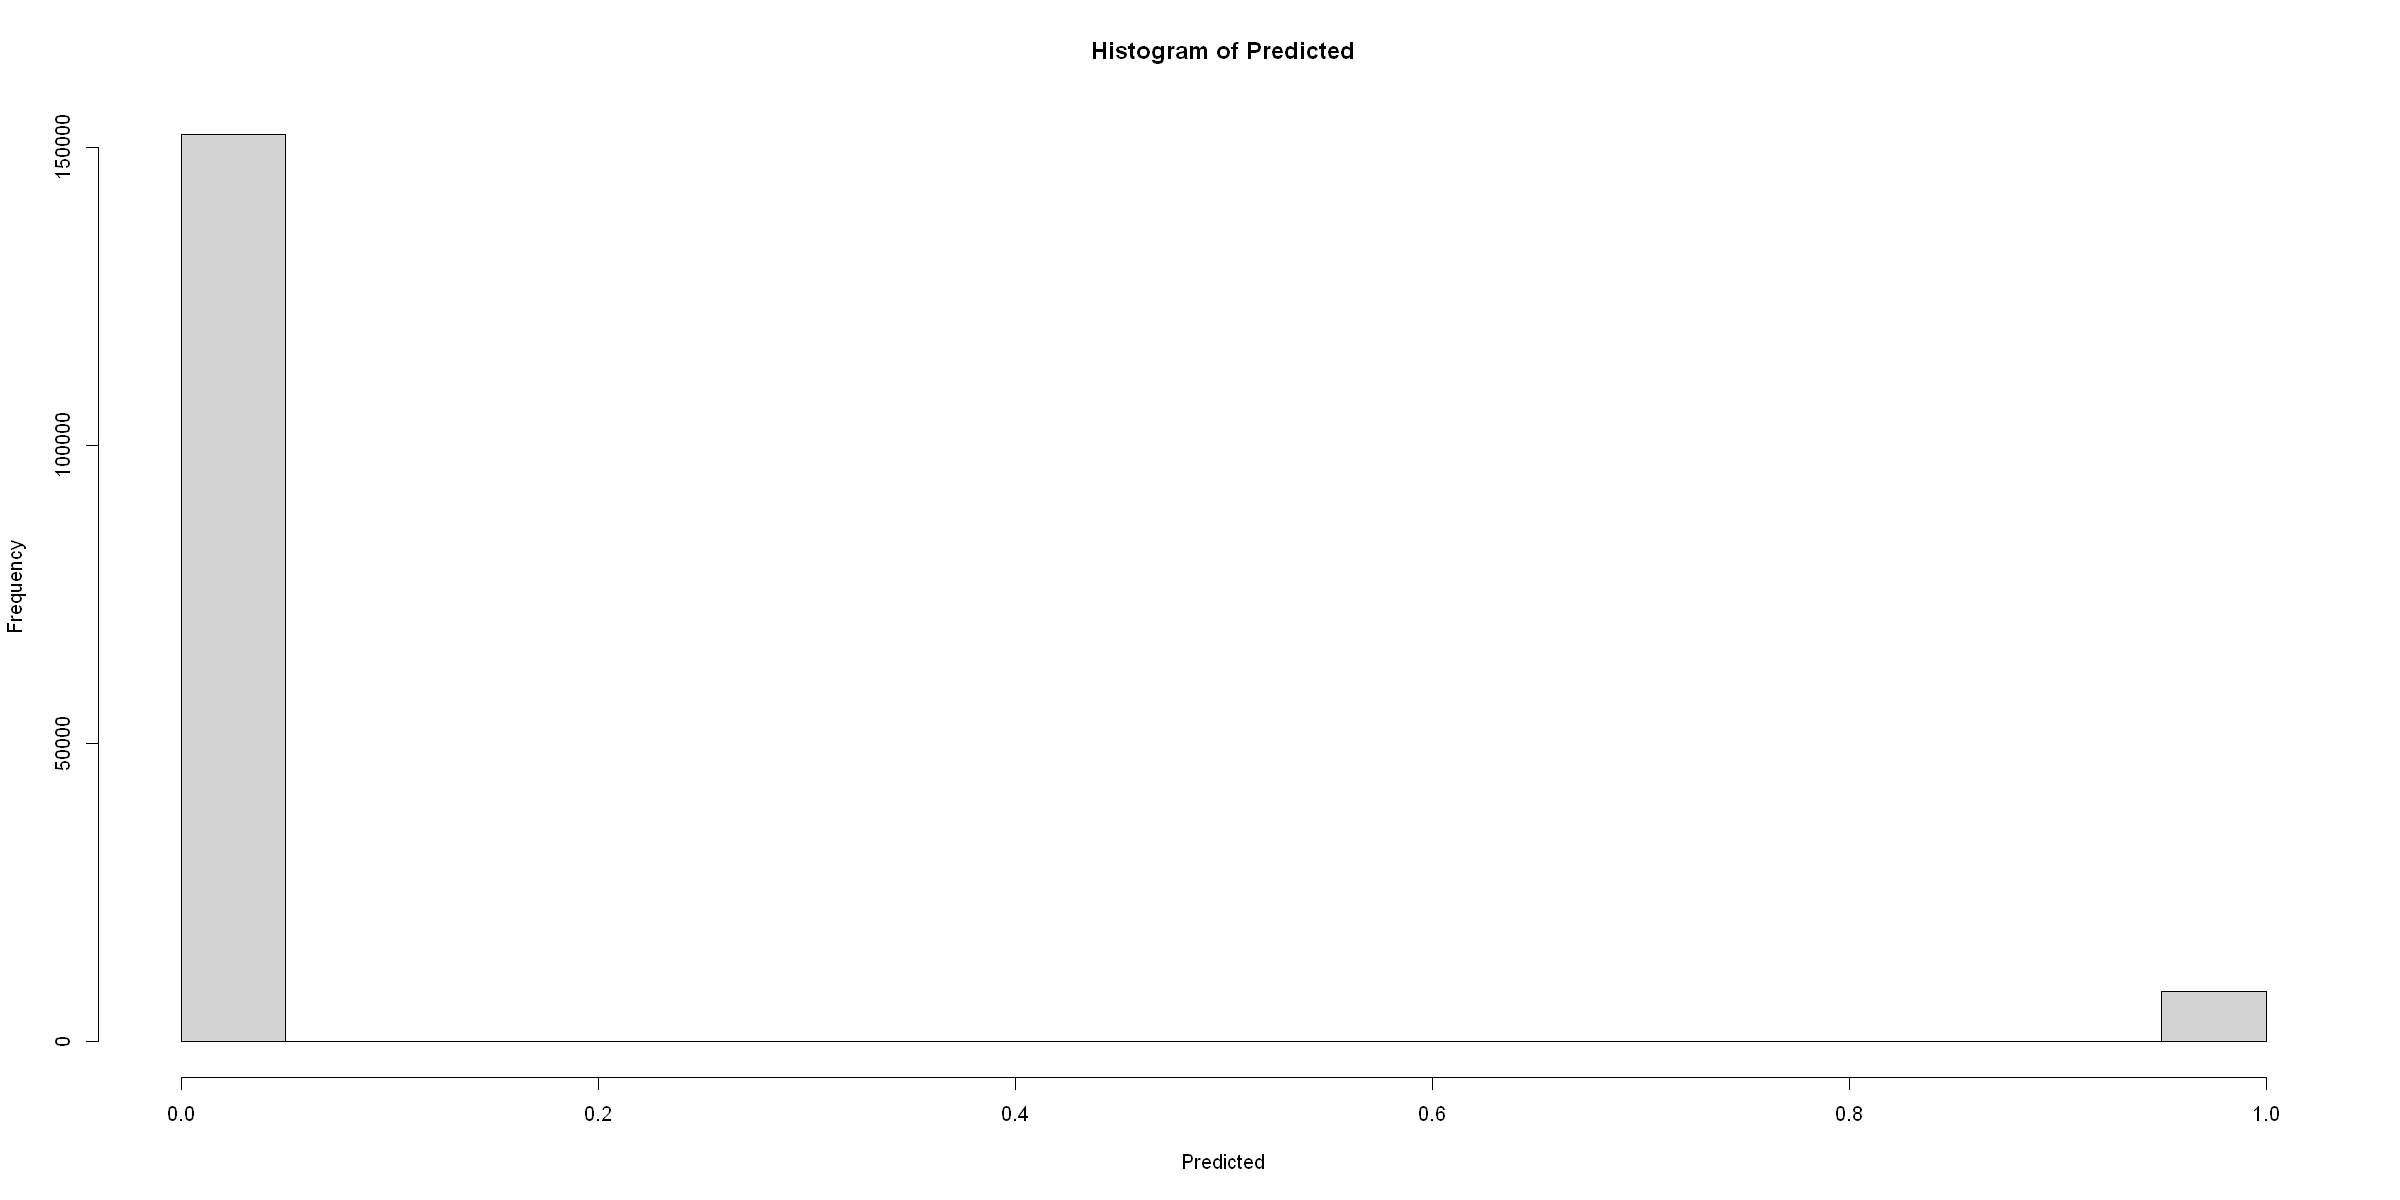

In [27]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [28]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [29]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
4572300,0
4572957,0
4572973,0
4572998,0
4573029,0
4573199,0


In [30]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,152235
1,8372


Esto significa que se enviaran 8157 estímulos

In [31]:
#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./labo/exp/",  showWarnings = FALSE ) 
dir.create( "./labo/exp/ZH2017/", showWarnings = FALSE )

fwrite( entrega, 
        file= "./labo/exp/ZH2017/para_Kaggle_0107.csv",
        sep=  "," )

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 13.87474